# 1. データの加工


**1.   気象データの前処理**

 市町村別気象データを都道府県別気象データにまとめ加工する。

> 1-1. モジュールのインポート

> 1-2. 関数の定義

> 1-3. ファイルの取り込み

> 1-4. 欠損値の確認

> 1-5. 欠損値の穴埋め

> 1-6. 市町村データを平均し都道府県別データにする

> 1-7. データフレームをcsv形式で保存する


**2. 気象データとブロッコリー収穫量データの結合**

気象データとブロッコリー収穫量データを結合する。

>2-1. モジュールのインポート

>2-2. 気象データと収穫量データを結合し気象条件ごとにcsv形式で保存

# 2. 機械学習によるブロッコリー収穫量の予測

**1. ブロッコリー収穫量の予測1**

生データ数値の気象データを用いてブロッコリーの収穫量を予測する。

>1-1. 線形回帰による予測

>1-2. ランダムフォレスト回帰による予測

**2. ブロッコリー収穫量の予測2　説明変数のクラスタリング化**

クラスタリングした気象データを用いてブロッコリーの収穫量を予測する。

>2-1. 気象データのクラスタリング

　　　2-1-2. 各気象条件ごとにデータをリスト化する

　　　2-1-3. 各気象条件データをクラスタリングする

>2-2. 線形回帰による予測

>2-3. ランダムフォレスト回帰による予測

**3. ブロッコリー収穫量の予測3　目的変数のクラス分け**

収穫量に応じてブロッコリー収穫量を分類し、数値気象データを用いてブロッコリー収穫量を予測する。

>3-1. 解析データの加工

　　3-1-1. ブロッコリー収穫量を収穫量に応じてクラス分けする

　　3-1-2. データファイルに上書きする

>3-2. 機械学習による目的変数の予測

　　3-2-1. モジュールをインポートし、ランダムを定義する

　　3-2-2. 解析する都道府県データを収穫量カテゴリ別に分ける

　　3-2-3. ランダムフォレストで予測する

　　3-2-4. グリッドサーチで最適化する

#3. ディープラーニングによるブロッコリー収穫量の予測
**1. 数値気象データを用いた予測**

生データ数値の気象データを用いてブロッコリーの収穫量を予測する。

**2. クラス分けしたブロッコリー収穫量の予測**

ブロッコリー収穫量を収穫量に応じてクラス分けして予測する。

#4. ブロッコリー収穫量を決定する気象要因の探索
**1. ブロッコリー収穫量に寄与する気象要因の特定**

機械学習を用いて各気象データ毎にブロッコリー収穫量を予測する

　1-1. モジュールのインポートとランダム設定

　1-2. ファイルの読み込み

　1-3. ランダムフォレストで分類予測

　1-4. グリッドサーチにより予測モデルの最適化

**2. ブロッコリー収穫量に寄与する日にちの特定**

決定木を用いてブロッコリー収穫量を分類予測し、分岐日を抽出する

　2-1. ファイルを読み込みデータをリスト化する

　2-2. 決定木モデルを用いてブロッコリー収穫量予測する

　2-3. モデルの分岐点を可視化する

　2-4. 分岐の日付を確認する

　2-5. （参考）降雪量の場合

**3. 分岐日から気象要因をする**

分岐日の前後5日の気象データを取り出す

　3-1. 収穫量が多い地域での検証

　3-2.　気温データ分岐日前5日間の平均気温

　3-3.　気温データ分岐日後5日間の平均気温

　3-4.　気温データ分岐日前後5日間の平均気温

　3-5. 他の気象データの傾向

　3-6. 収穫量が少ない地域での検証

　3-7. （参考）収穫量が多い地域での検証

# 1. データの加工

**1. 気象データの前処理**

 　市町村別気象データを都道府県気象データに加工する

　1-1. モジュールのインポート

In [ ]:
import glob
import pandas as pd
import numpy as np

　1-2. 関数の定義

In [ ]:
def nan_check():
  for t_df in df_list:
    print(t_df.head())
    # 各列のNaNの確認
    print(t_df['temp'].hasnans)
    print(t_df['prec'].hasnans)
    print(t_df['sun'].hasnans)
    print(t_df['snow'].hasnans)
    print(t_df['humi'].hasnans)

　1-3. ファイルの取り込み
*   Numbersで処理したcsvを都道府県ごとにcolab上にアップロードし、
*   市町村全てのデータを取り込む

*愛知県のデータ例: aa_22_m.csv, ag_22_m.csv, ai_22_m.csv, am_22_m.csv, ao_22_m.csv, as_22_m.csv, at_22_m.csv, aty_22_m.csv*

In [ ]:
file_list = glob.glob('/content/*.csv')
print(type(file_list))
print(file_list)

　1-4. 欠損値の確認
*   #1. pandasをインポート
*   #2. 市町村データファイルをデータフレームに変換する
*   #3. データを確認する
*   #4. データのinfoを確認する
*   #5. 各気象データの品質を確認する
*   #6. 各気象データのNaNを確認する

In [ ]:
#1 pandasをインポート
import pandas as pd

#2 市町村データファイルをデータフレームに変換する
for f in file_list:
  df= pd.read_csv(f) # 個別にファイル名を指定

  #3 データを確認する
  print(df.head())

  #4 データのinfoを確認する
  df.info()

  #5 各気象データの品質を確認する
  print(df['temp_q'].value_counts())
  print(df['prec_q'].value_counts())
  print(df['sun_q'].value_counts())
  print(df['snow_q'].value_counts())
  print(df['humi_q'].value_counts())

  #6 各気象データのNaNを確認する
  print(df['temp'].hasnans)
  print(df['prec'].hasnans)
  print(df['sun'].hasnans)
  print(df['snow'].hasnans)
  print(df['humi'].hasnans)


（オプション）品質情報1のカラムのデータ確認

※ 品質情報1:欠損、品質情報4:データとしての扱いに注意、品質情報5:データとして使用可能、品質情報8:正常データ

In [ ]:
df.query('temp_q == 1')

　1-5. 欠損値の穴埋め


*   #1. pandasをインポートする（インポート済みの場合は不要）

*   #2. 読み込んだファイルを順にデータフレームに変換する（データフレームに変換済みの場合は不要）

*   #3. 欠損データを処理する：（気温データの場合）データdf['temp']がNaNかつ品質番号df['temp_q']が1である時、前後データから予測して欠損値を埋め、df['temp']がNaNまたはdf['temp_q']が1である場合は、0で埋める

*   #4. 欠損値処理したデータからデータフレームを作成

*   #5. データフレームをリストに追加する











In [ ]:
#1 pandasをインポートする
import pandas as pd
df_list = []

#2 csvファイルのデータフレーム化
for f in file_list:
  #3 欠損データを処理する
  df= pd.read_csv(f) # 個別にファイル名を指定
  if df['temp'].hasnans and 1 in df['temp_q'].values:
    df['temp'].interpolate(inplace= True, limit_direction='both')
  else:
    df['temp'].fillna(0,inplace = True)

  if df['prec'].hasnans and 1 in df['prec_q'].values:
    df['prec'].interpolate(inplace= True, limit_direction='both')
  else:
    df['prec'].fillna(0,inplace = True)

  if df['sun'].hasnans and 1 in df['sun_q'].values:
    df['sun'].interpolate(inplace= True, limit_direction='both')
  else:
    df['sun'].fillna(0,inplace = True)

  if df['snow'].hasnans and 1 in df['snow_q'].values:
    df['snow'].interpolate(inplace= True, limit_direction='both')
  else:
    df['snow'].fillna(0,inplace = True)

  if df['humi'].hasnans and 1 in df['humi_q'].values:
    df['humi'].interpolate(inplace= True, limit_direction='both')
  else:
    df['humi'].fillna(0,inplace = True)

 #4 欠損処理済みデータフレームを作成
  t_df = pd.DataFrame(df, columns= ['temp', 'prec', 'sun', 'snow', 'humi'])

  #5 データフレームをリスト（df_list）に追加
  df_list.append(t_df)

df_list

（オプション）欠損値データ確認

In [ ]:
nan_check()

　1-6. 市町村データを平均し都道府県別データにする

欠損処理した市町村データを気象条件ごとに平均値および標準偏差を算出し1つの都道府県データとする。



*   #1 リスト(df_list)に入れたデータフレームの平均値および標準偏差を算出する

*   #2 平均値の調節（データがある市町村から平均値を算出）

*   #3 日付と平均値データフレームをマージする

*   #4 #3のデータフレームに標準偏差データをマージする

*   #5 データを確認する








In [ ]:
#1 リスト（df_list）に入れたデータフレームの平均値および標準偏差を算出する。
df_m = pd.DataFrame(np.mean([df_list[0], df_list[1], df_list[2], df_list[3], df_list[4], df_list[5], df_list[6], df_list[7]], 0), columns=t_df.columns)
df_s = pd.DataFrame(np.std([df_list[0], df_list[1], df_list[2], df_list[3], df_list[4], df_list[5], df_list[6], df_list[7]], 0), columns=t_df.columns)


#2 平均の調節
df_m['snow'] = df_m['snow'] *8/4
df_m['humi'] = df_m['humi'] *8/1

#3 日付データと平均値データをマージする
all_df = pd.merge(df[['date']], df_m, left_index=True, right_index= True)

#4 #3データフレームに標準偏差をマージする
pref_df = pd.merge(all_df, df_s[['temp_s', 'prec_s', 'sun_s', 'snow_s', 'humi_s']], left_index=True, right_index= True)

#5 データを確認する
pref_df.head()

　1-7. データフレームをcsv形式で保存する

市町村データから都道府県データにまとめたものをcsv形式で保存する

In [ ]:
pref_df.to_csv('pref_df.csv')

**2. 気象データとブロッコリー収穫量データの結合**

気象データとブロッコリー収穫量データを結合する。



　2-1. モジュールのインポート




In [ ]:
mport pandas as pd

　2-2. 気象データと収穫量データを結合し気象条件ごとにcsv形式で保存



*   #1. csvファイルを取り込みデータフレームにする
*   #2. ブロッコリー収穫量をカラムに追加する
*   #3. 各気象データと日付、収穫量を取り出しcsv形式で保存する
*   #4. 取り込んだcsvファイルを上書きする





In [ ]:
# 収穫量をデータフレームに追加して気象データごとにファイルを分割して保存する

#1 csvファイルを取り込みデータフレームにする
df = pd.read_csv('/content/pref_df.csv')

#2 ブロッコリー収穫量をカラムに追加する
df['Broc']= 1410

#3 各気象データと日付、収穫量を取り出しcsv形式で保存する
# 気温データのデータフレームを作成して、保存
Br_temp = df[['date','temp','Broc']]
Br_temp.to_csv('tBroc_pref_df.csv', index=False)

# 降水量データのデータフレームを作成して、保存
Br_prec = df[['date', 'prec', 'Broc']]
Br_prec.to_csv('pBroc_pref_df.csv', index=False)

# 日照時間データのデータフレームを作成して、保存
Br_sun = df[['date', 'sun', 'Broc']]
Br_sun.to_csv('sBroc_pref_df.csv', index=False)

# 降雪量データのデータフレームを作成して、保存
Br_snow = df[['date', 'snow', 'Broc']]
Br_snow.to_csv('snBroc_pref_df.csv', index=False)

# 湿度データのデータフレームを作成して、保存
Br_humi = df[['date', 'humi', 'Broc']]
Br_humi.to_csv('hBroc_pref_df.csv', index=False)

#4 取り込んだcsvファイルを上書きする
# ブロッコリーデータをpref_dfに加えて、保存
df.to_csv('pref_df.csv', index=False)

# 2. ブロッコリー収穫量の予測

**1. ブロッコリー収穫量の予測1**

生データ数値の気象データを用いてブロッコリーの収穫量を予測する。

　1-1. 線形回帰による予測

*   #1. モジュールをインポートする

*   #2. ファイルを読み込みリスト化する

*   #3. csvファイルからデータセットのリストを作る

*   #4. 学習データとテストデータを分割する

*   #5. 線形回帰モデルで学習する

*   #6. モデルを評価する


In [ ]:
#1 モジュールをインポートする
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#2 ファイルを読み込みリスト化する
file_list = glob.glob('/content/*.csv')
print(file_list) #取り込んだファイルの順序を表示する

#3 csvファイルからデータセットのリストを作る
# 説明変数リストdata_list、目的変数リストBrocを作成
Broc = []
data_list = []
for file in file_list:
  df = pd.read_csv(file)
  Broc.append(df['Broc'][0]) # ブロッコリー収穫量をリスト化する目的変数にあたる

  df = df[['temp','prec', 'sun', 'snow', 'humi']] # 気象データ5条件を取り出す
  data_list.append(df.values.ravel()) # (365, 5)データを一次元配列にして、読み込みファイル分リスト化する説明変数にあたる

#4　学習データとテストデータを分割する
X_train, X_test, y_train, y_test = train_test_split(data_list, Broc, test_size= 0.3, random_state=0)

#5 線形回帰モデルで学習する
model = LinearRegression()
model.fit(X_train, y_train)

#6 モデルを評価する（正解率、予測結果の確認）
model.score(X_test,y_test)
model.predict(X_test)

　1-2. ランダムフォレスト回帰による予測

*   #1. モジュールをインポートする

*   #2. ファイルを読み込みリスト化する

*   #3. csvファイルからデータセットのリストを作る

*   #4. 学習データとテストデータを分割する

*   #5. ランダムフォレスト回帰モデルで学習する

*   #6. モデルを評価する

In [ ]:
#1 モジュールをインポートする
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#2 ファイルを読み込みリスト化する
file_list = glob.glob('/content/*.csv')
print(file_list) #取り込んだファイルの順序を表示する

#3 csvファイルからデータセットのリストを作る
# 説明変数リストdata_list、目的変数リストBrocを作成
Broc = []
data_list = []
for file in file_list:
  df = pd.read_csv(file)
  Broc.append(df['Broc'][0]) # ブロッコリー収穫量をリスト化する目的変数にあたる

  df = df[['temp','prec', 'sun', 'snow', 'humi']] # 気象データ5条件を取り出す
  data_list.append(df.values.ravel()) # (365, 5)データを一次元配列にして、読み込みファイル分リスト化する説明変数にあたる

#4　学習データとテストデータを分割する
X_train, X_test, y_train, y_test = train_test_split(data_list, Broc, test_size= 0.3, random_state=0)

#5 ランダムフォレスト回帰モデルで学習する
model = RandomForestRegressor(n_estimators=10, criterion='squared_error', max_depth=None)
model.fit(X_train, y_train)

#6 モデルを評価する（正解率、予測結果の確認）
model.score(X_test,y_test)
model.predict(X_test)

**2. ブロッコリー収穫量の予測2　説明変数のクラスタリング化**

クラスタリングした気象データを用いてブロッコリーの収穫量を予測する。

　2-1. 気象データのクラスタリング

　　　2-1. 各気象条件ごとにファイルを分別する

*   #1. モジュールをインポートする
*   #2. 都道府県ファイルを読み込む
*   #3. 正規表現を使って、気象データごとにファイルを分別する


In [ ]:
#1 モジュールをインポートする
import re

#2 都道府県ファイルを読み込む
file_list = glob.glob('/content/*.csv')

#3 正規表現を使って、気象データごとにファイルを分別する
# 気温データ道府県をリスト化する（ファイル名にtBrocがあるものを集める）
file_name_pattern = re.compile(r'.*tBroc.*')
file_t =[]
for file_name in file_list:
  # ファイル名に対する正規表現パターンが一致するか確認
  if file_name_pattern.match(file_name):
    file_t.append(file_name)
  else:
    continue

# 日照時間データ道府県をリスト化する（ファイル名にsBrocがあるものを集める）
file_name_pattern = re.compile(r'.*sBroc.*')
file_s =[]
for file_name in file_list:
  # ファイル名に対する正規表現パターンが一致するか確認
  if file_name_pattern.match(file_name):
    file_s.append(file_name)
  else:
    continue

# 降水量データ道府県をリスト化する（ファイル名にpBrocがあるものを集める）
file_name_pattern = re.compile(r'.*pBroc.*')
file_p =[]
for file_name in file_list:
  # ファイル名に対する正規表現パターンが一致するか確認
  if file_name_pattern.match(file_name):
    file_p.append(file_name)
  else:
    continue

# 降雪量データ道府県をリスト化する（ファイル名にsnBrocがあるものを集める）
file_name_pattern = re.compile(r'.*snBroc.*')
file_sn =[]
for file_name in file_list:
  # ファイル名に対する正規表現パターンが一致するか確認
  if file_name_pattern.match(file_name):
    file_sn.append(file_name)
  else:
    continue

# 湿度データ道府県をリスト化する（ファイル名にhBrocがあるものを集める）
file_name_pattern = re.compile(r'.*hBroc.*')
file_h =[]
for file_name in file_list:
  # ファイル名に対する正規表現パターンが一致するか確認
  if file_name_pattern.match(file_name):
    file_h.append(file_name)
  else:
    continue

　　2-2. 各気象条件データをクラスタリングする

気象条件ごとに実施する

*   #1. モジュールをインポートする（インポート済みの場合は不要）

*   #2. 気象条件別ファイルをブロッコリー収穫量と気象データに分ける

*   #3. KMeansでクラスタリングする

*   #4. 正規表現パターンでファイル名から道府県アルファベットを取り出す

*   #5. クラスタリング結果と道府県名を持つデータフレームを作成する

*   #6. 全ての気象データとブロッコリー収穫量、都道府県名を結合する




In [ ]:
#1 モジュールをインポートする
import re


# 湿度
#2 ファイルをブロッコリー収穫量と気象データに分ける
Broc = []
Humi = []

for f in file_h:
  df= pd.read_csv(f) # 個別にファイル名を指定

  df = df.T #行列を入れ替える

  df.columns = df.iloc[0] #日付をカラムにする

  df = df.drop(df.index[0]) #日付行を削除する

  # リストにデータを追加する
  Broc.append(df.loc['Broc'][0]) #BrocリストにBrocの値を追加

  Humi.append(df.loc['humi'].values) # HumiリストにHumiの値を追加

#3 KMeansでクラスタリングする
model = KMeans(n_clusters=4, random_state=0)
model.fit(Humi)

df_humi = pd.DataFrame(data = Humi)

df_humi['クラス'] = model.labels_
df_m['humi_c']=df_humi['クラス']


#4 正規表現パターンでファイル名から道府県アルファベットを取り出す
pattern = re.compile(r'_([A-Z]+)_')
pref_list = []
for f in file_h:
  match = pattern.search(f) # ファイル名から正規表現に一致する部分を検索
  if match: # 一致した部分を取り出す
    result = match.group(1)
    pref_list.append(result)
  else:
    print('Match not found.')

#5 クラスタリング結果と道府県名を持つデータフレームを作成する
df_humi['pref'] = pref_list
df_humi['humi_c']=df_humi['クラス']

# 日照時間

# リストにデータを追加する
Broc = []
Sun = []

for f in file_s:
  df= pd.read_csv(f) # 個別にファイル名を指定

  df = df.T #行列を入れ替える

  df.columns = df.iloc[0] #日付をカラムにする

  df = df.drop(df.index[0]) #日付行を削除する

  # リストにデータを追加する
  Broc.append(df.loc['Broc'][0]) #BrocリストにBrocの値を追加

  Sun.append(df.loc['sun'].values) # TempリストにTempの値を追加


# KMeansでクラスタリング
model = KMeans(n_clusters=4, random_state=0)
model.fit(Sun)

df_sun = pd.DataFrame(data = Sun)

df_sun['クラス'] = model.labels_
df_m['sun_c']=df_sun['クラス']

import re

# 正規表現パターン
pattern = re.compile(r'_([A-Z]+)_')
pref_list = []
for f in file_s:
  match = pattern.search(f) # ファイル名から正規表現に一致する部分を検索
  if match: # 一致した部分を取り出す
    result = match.group(1)
    pref_list.append(result)
  else:
    print('Match not found.')

df_sun['pref'] = pref_list
df_sun['sun_c']=df_prec['クラス']


#　降水量

# リストにデータを追加する
Broc = []
Prec = []

for f in file_p:
  df= pd.read_csv(f) # 個別にファイル名を指定

  df = df.T #行列を入れ替える

  df.columns = df.iloc[0] #日付をカラムにする

  df = df.drop(df.index[0]) #日付行を削除する

  # リストにデータを追加する
  Broc.append(df.loc['Broc'][0]) #BrocリストにBrocの値を追加

  Prec.append(df.loc['prec'].values) # PrecリストにPrecの値を追加

#KMeansでクラスタリング　クラスタ4
model = KMeans(n_clusters=4, random_state=0)
model.fit(Prec)

df_prec = pd.DataFrame(data = Prec)

df_prec['クラス'] = model.labels_
df_m['prec_c']=df_prec['クラス']

import re

# 正規表現パターン
pattern = re.compile(r'_([A-Z]+)_')
pref_list = []
for f in file_p:
  match = pattern.search(f) # ファイル名から正規表現に一致する部分を検索
  if match: # 一致した部分を取り出す
    result = match.group(1)
    pref_list.append(result)
  else:
    print('Match not found.')

df_prec['pref'] = pref_list
df_prec['prec_c']=df_prec['クラス']


#雪

# リストにデータを追加する
Broc = []
Snow = []

for f in file_sn:
  df= pd.read_csv(f) # 個別にファイル名を指定

  df = df.T #行列を入れ替える

  df.columns = df.iloc[0] #日付をカラムにする

  df = df.drop(df.index[0]) #日付行を削除する

  # リストにデータを追加する
  Broc.append(df.loc['Broc'][0]) #BrocリストにBrocの値を追加

  Snow.append(df.loc['snow'].values) # TempリストにTempの値を追加


#KMeansでクラスタリング クラスタ4
model = KMeans(n_clusters=4, random_state=0)
model.fit(Snow)

df_snow = pd.DataFrame(data = Snow)

df_snow['クラス'] = model.labels_
df_m['snow_c']=df_snow['クラス']

Date = df.columns.tolist()


import re

# 正規表現パターン
pattern = re.compile(r'_([A-Z]+)_')
pref_list = []
for f in file_sn:
  match = pattern.search(f) # ファイル名から正規表現に一致する部分を検索
  if match: # 一致した部分を取り出す
    result = match.group(1)
    pref_list.append(result)
  else:
    print('Match not found.')

df_snow['pref'] = pref_list
df_snow['snow_c']=df_snow['クラス']


#　気温

# リストにデータを追加する
Broc = []
Temp = []

for f in file_t:
  df= pd.read_csv(f) # 個別にファイル名を指定

  df = df.T #行列を入れ替える

  df.columns = df.iloc[0] #日付をカラムにする

  df = df.drop(df.index[0]) #日付行を削除する

  # リストにデータを追加する
  Broc.append(df.loc['Broc'][0]) #BrocリストにBrocの値を追加

  Temp.append(df.loc['temp'].values) # TempリストにTempの値を追加

#KMeansでクラスタリング
model = KMeans(n_clusters=4, random_state=0)
model.fit(Temp)

df_temp = pd.DataFrame(data = Temp)

df_temp['クラス'] = model.labels_
df_m['temp_c']=df_temp['クラス']


# 正規表現パターン
pattern = re.compile(r'_([A-Z]+)_')
pref_list = []
for f in file_t:
  match = pattern.search(f) # ファイル名から正規表現に一致する部分を検索
  if match: # 一致した部分を取り出す
    result = match.group(1)
    pref_list.append(result)
  else:
    print('Match not found.')

df_temp['pref'] = pref_list
df_temp['temp_c']=df_temp['クラス']
df_temp['Broc'] = Broc



#6 全ての気象データとブロッコリー収穫量、都道府県名を結合する
result_df = pd.merge(df_temp[['temp_c', 'pref','Broc']],
                     df_snow[['snow_c', 'pref']],
                     on='pref')

result_df = pd.merge(result_df,
                     df_humi[['humi_c', 'pref']],
                     on='pref')

result_df = pd.merge(result_df,
                     df_sun[['sun_c', 'pref']],
                     on='pref')

result_df = pd.merge(result_df,
                     df_prec[['prec_c', 'pref']],
                     on='pref')


result_df


　2-3. データを説明変数と目的変数に分ける





In [ ]:
data = result_df[['temp_c', 'snow_c', 'humi_c', 'sun_c', 'prec_c']]
y = result_df['Broc']

　2-4. 線形回帰による予測


*   #1. モジュールをインポートする

*   #2. 学習データとテストデータに分割する

*   #3. 線形回帰モデルで学習する

*   #4. モデルを評価する





In [ ]:
#1　モジュールをインポートする
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#2 学習データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size= 0.4, random_state=150)

#3 線形回帰モデルで学習する
model = LinearRegression()
model.fit(X_train, y_train)

#4 モデルを評価する
model.score(X_test,y_test)
model.predict(X_test)

　3-1. 解析データの加工

　　3-1-1. ブロッコリー収穫量を収穫量に応じてクラス分けする

*   #1. pandasをインポートする
*   #2. 都道府県データを読み込む
*   #3. ブロッコリー収穫量に応じてクラス分けし、カテゴリごとにデータフレームに追加する
*   #4. カテゴリの追加を確認する



In [ ]:
#1 pandasをインポートする
import pandas as pd

#2 都道府県データを読み込む
df = pd.read_csv('/content/YMN_df.csv')

#3 ブロッコリー収穫量に応じてクラス分けし、以下の条件でカテゴリごとにデータフレームに追加する
# カテゴリclass_2 収穫量1010kg/10a全国平均より多い(=0)、少ない(=1)
if df['Broc'][0] > 1010:
  df['Broc_class2'] = 0
else:
  df['Broc_class2'] = 1

# カテゴリclass_6 収穫量に応じで6段階のクラス　0多い→5少ない
if df['Broc'][0] > 1400:
  df['Broc_class6'] = 0
elif 1400 >= df['Broc'][0] > 1200:
  df['Broc_class6'] = 1
elif 1200 >= df['Broc'][0] > 1010:
  df['Broc_class6'] = 2
elif 1010 >= df['Broc'][0] > 800:
  df['Broc_class6'] = 3
elif 800 >= df['Broc'][0] > 600:
  df['Broc_class6'] = 4
else:
  df['Broc_class6'] = 5

# カテゴリclass_4 収穫量に応じて4段階のクラス 0多い 3少ない
if df['Broc'][0] > 1300:
  df['Broc_class4'] = 0
elif 1300 >= df['Broc'][0] > 1010:
  df['Broc_class4'] = 1
elif 1010 >= df['Broc'][0] > 700:
  df['Broc_class4'] = 2
else:
  df['Broc_class4'] = 3

#4 カテゴリの追加についてデータフレームを確認
df.head()

,date,temp,prec,sun,snow,humi,temp_s,prec_s,sun_s,snow_s,humi_s,Broc,Broc_class2,Broc_class6,Broc_class4
0,2022/1/1,-0.9750,0.0,8.5875,0.0,38.666667,1.881987,0.0,0.590418,0.0,19.595918,981,1,3,2
1,2022/1/2,-1.1250,0.0,7.8750,0.0,59.333333,1.330179,0.0,0.465698,0.0,28.873647,981,1,3,2
2,2022/1/3,1.2250,0.0,8.5625,0.0,65.000000,1.046124,0.0,0.624375,0.0,31.768449,981,1,3,2
3,2022/1/4,2.0750,0.0,8.2250,0.0,52.666667,1.314106,0.0,0.672216,0.0,25.655165,981,1,3,2
4,2022/1/5,0.1125,0.0,8.5750,0.0,36.333333,2.123345,0.0,0.619980,0.0,17.656001,981,1,3,2


　　3-1-2. データファイルに上書きする

In [ ]:
df.to_csv('YMN_df.csv')

　3-2. 機械学習で目的変数を予測する

　　3-2-1. モジュールをインポートし、ランダムを定義する

In [ ]:
import pandas as pd
import numpy as np
import glob
from sklearn.metrics import mean_squared_error
# 任意の整数をランダムシードとして設定
random_seed = 0

# NumPyのrandomモジュールにランダムシードを設定
np.random.seed(random_seed)

　　3-2-2. 解析する都道府県データを収穫量カテゴリ別に分ける
*   #1. ファイルを読み込む
*   #2. ファイルデータをリスト化する
*   #3. 気象データを抽出しリスト化する

In [ ]:
#1 ファイルを読み込む
file_list = glob.glob('/content/*.csv')
print(file_list)

#2 ファイルデータをリスト化する
Broc = []
Broc_class2 = []
Broc_class4 = []
Broc_class6 = []
data_list = []
df_list = []
for file in file_list:
  df = pd.read_csv(file)
  Broc.append(df['Broc'][0])
  Broc_class2.append(df['Broc_class2'][0])
  Broc_class4.append(df['Broc_class4'][0])
  Broc_class6.append(df['Broc_class6'][0])

#3 気象データを抽出しリスト化する
#  df = df[['temp','prec', 'sun', 'snow', 'humi']] #全ての気象データを分析データに用いる
  df_cond = df[['temp','snow']] #気象データのうち気温と降雪量を抽出し分析データに用いる
  data_list.append(df_cond.values.ravel())

['/content/IWT_df.csv', '/content/SAG_df.csv', '/content/YGT_df.csv', '/content/TCG_df.csv', '/content/HYG_df.csv', '/content/NGN_df.csv', '/content/OKY_df.csv', '/content/AIC_df.csv', '/content/WKY_df.csv', '/content/SIG_df.csv', '/content/TTR_df.csv', '/content/SZO_df.csv', '/content/GNM_df.csv', '/content/IBR_df.csv', '/content/FKO_df.csv', '/content/FKI_df.csv', '/content/KNG_df.csv', '/content/ISK_df.csv', '/content/SMN_df.csv', '/content/YMN_df.csv', '/content/KUC_df.csv', '/content/AOM_df.csv', '/content/OIT_df.csv', '/content/HKD_df.csv', '/content/AKT_df.csv', '/content/GIF_df.csv', '/content/NAR_df.csv', '/content/KGW_df.csv', '/content/KMM_df.csv', '/content/NGT_df.csv', '/content/TYM_df.csv', '/content/FKS_df.csv', '/content/OKN_df.csv', '/content/MYZ_df.csv', '/content/MYG_df.csv', '/content/CHB_df.csv', '/content/NGS_df.csv', '/content/SIT_df.csv', '/content/OSK_df.csv', '/content/TKS_df.csv', '/content/YGC_df.csv', '/content/KYT_df.csv']


　　3-2-3. ランダムフォレストで予測する
*   #1. train_test_splitとRandomForestClassifierをインポートする
*   #2. 説明変数と目的変数を定義する
*   #3. 気象データを分割する　目的変数y4の場合
*   #4. ランダムフォレストで分類する
*   #5. モデルを評価する

In [ ]:
#1 train_test_splitとRandomForestClassifierをインポートする
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#2 説明変数と目的変数を定義する
X = data_list #説明変数=気象データ
#目的変数カテゴリ=ブロッコリー収穫量
y2 = Broc_class2
y4 = Broc_class4 #ほどよく精度が保たれる
y6 = Broc_class6

#3 気象データを分割する目的変数y4の場合
X_train, X_test, y_train, y_test = train_test_split(X, y4, test_size= 0.3, random_state=random_seed)

#4 ランダムフォレストで分類する
model = RandomForestClassifier(random_state= random_seed)
model.fit(X_train, y_train)

#5 モデルを評価する
model.score(X_test,y_test)

0.6153846153846154

　　3-2-4. グリッドサーチで最適化する

*   #1. グリッドサーチCVをインポートする

*   #2. グリッドサーチCVで検討するパラメータを設定

*   #3. グリッドサーチCVで最適なパラメータを検索

*   #4. ベストなパラメータとベストなモデルの変数を定義

*   #5. ベストなモデルで評価する




In [ ]:
#1 グリッドサーチCVをインポートする
from sklearn.model_selection import GridSearchCV

#2 グリッドサーチCVで検討するパラメータを設定
param_grid = {
    'n_estimators': [40, 50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#3 グリッドサーチCVで最適なパラメータを検索
grid_search = GridSearchCV(RandomForestClassifier(random_state=random_seed), param_grid, cv=2)
grid_search.fit(X_train, y_train)

#4 ベストなパラメータとベストなモデルの変数を定義
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#5 ベストなモデルで評価
score = best_model.score(X_test, y_test)
print(score)

0.7692307692307693


#3. ディープラーニングによるブロッコリーの収穫量の予測


**1. 数値気象データを用いた予測**

生データ数値の気象データを用いてブロッコリーの収穫量を予測する。

　1-1. データ前処理に必要なライブラリのインポート

In [ ]:
import pandas as pd
import numpy as np
import glob

　1-2. ファイルの読み込みと使用データの抽出

In [ ]:
#ファイルを読み込む
file_list = glob.glob('/content/*.csv')
print(file_list)
Broc = []
data_list = []
df_list = []
for file in file_list:
  df = pd.read_csv(file)
  Broc.append(df['Broc'][0]) #各都道府県のデータフレームからブロッコリー収穫量データを抽出リスト化

  df = df[['temp','prec', 'sun', 'snow', 'humi']]# 各都道府県のデータフレームから使用する気象データを抽出

  df_list.append(df.values) # 抽出気象データフレームをndarrayに変換してリスト化 >ディープラーニング用

['/content/FKO_df.csv', '/content/GIF_df.csv', '/content/OSK_df.csv', '/content/AIC_df.csv', '/content/MYZ_df.csv', '/content/KUC_df.csv', '/content/GNM_df.csv', '/content/FKI_df.csv', '/content/KGW_df.csv', '/content/OKN_df.csv', '/content/KMM_df.csv', '/content/CHB_df.csv', '/content/HKD_df.csv', '/content/KYT_df.csv', '/content/SZO_df.csv', '/content/KNG_df.csv', '/content/AOM_df.csv', '/content/YGT_df.csv', '/content/YGC_df.csv', '/content/TTR_df.csv', '/content/NGS_df.csv', '/content/AKT_df.csv', '/content/ISK_df.csv', '/content/YMN_df.csv', '/content/TCG_df.csv', '/content/IWT_df.csv', '/content/HYG_df.csv', '/content/TKS_df.csv', '/content/MYG_df.csv', '/content/NAR_df.csv', '/content/TYM_df.csv', '/content/WKY_df.csv', '/content/NGN_df.csv', '/content/OIT_df.csv', '/content/SAG_df.csv', '/content/SIT_df.csv', '/content/SIG_df.csv', '/content/OKY_df.csv', '/content/SMN_df.csv', '/content/FKS_df.csv', '/content/NGT_df.csv', '/content/IBR_df.csv']


　1-3. データを分割し、学習データリストとテストデータリストのndarray型への変換

In [ ]:
# 学習データとテストデータを分割する
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_list, Broc, test_size= 0.3, random_state=0)

# X_trainとy_trainをNumPy配列に変換
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

# X_testとy_testをNumPy配列に変換
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# データの形状を確認 (必要に応じて)
print(X_train_np.shape)  # この出力が (サンプル数, 365, 5) になることを確認
print(y_train_np.shape)  # この出力が (サンプル数,) または (サンプル数, 1) になることを確認


(29, 365, 5)
(29,)


　1-4.　ディープラーニングに必要なライブラリをインポート

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization


　1-5. モデルの設定

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(365, 5)))
model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())  # Batch Normalization層の追加
model.add(Dense(1, activation='linear'))

# モデルの概要
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1825)              0         
                                                                 
 dense (Dense)               (None, 128)               233728    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 233857 (913.50 KB)
Trainable params: 233857 (913.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


　1-6. モデルのトレーニング

In [ ]:
# モデルのトレーニング設定
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.00001)  # 学習率を0.001に減少
model.compile(optimizer=optimizer, loss='mean_squared_error')

# モデルのトレーニング
model.fit(X_train_np, y_train_np, batch_size=10, epochs=50)

　1-7. モデルの評価

In [ ]:
y_pred=model.predict(X_test_np)
print(y_pred)
y_test

1/1 [==============================] - 0s 41ms/step
[[ 780.738  ]
 [ 992.4334 ]
 [1021.86597]
 [1022.7567 ]
 [ 883.9888 ]
 [ 804.71936]
 [ 952.74304]
 [1087.8271 ]
 [ 906.0602 ]
 [1154.8904 ]
 [1118.3839 ]
 [ 848.6231 ]
 [ 979.3304 ]]


[880, 829, 1200, 1180, 938, 750, 669, 859, 895, 847, 1190, 1050, 908]

**2. クラス分けしたブロッコリー収穫量の予測**

ブロッコリー収穫量を収穫量に応じてクラス分けして予測する。

目的変数を加工して予測する。

 2-1. モジュールのインポートとランダムの設定

In [ ]:
import pandas as pd
import numpy as np
import glob
from sklearn.metrics import mean_squared_error
# 任意の整数をランダムシードとして設定
random_seed = 0

# NumPyのrandomモジュールにランダムシードを設定
np.random.seed(random_seed)

　2-2. ファイルの読み込み

In [ ]:
#ファイルを読み込む
file_list = glob.glob('/content/*.csv')
print(file_list)
Broc = []
Broc_class2 = []
Broc_class4 = []
Broc_class6 = []
data_list = []
df_list = []
for file in file_list:
  df = pd.read_csv(file)
  Broc.append(df['Broc'][0])
  Broc_class2.append(df['Broc_class2'][0])
  Broc_class4.append(df['Broc_class4'][0])
  Broc_class6.append(df['Broc_class6'][0])


  df = df[['temp','prec', 'sun', 'snow', 'humi']]
#  df_cond = df[['temp','snow']]
  data_list.append(df.values.ravel())
  df_list.append(df.values)
#Date = df['date'].tolist()

['/content/FKO_df.csv', '/content/GIF_df.csv', '/content/OSK_df.csv', '/content/AIC_df.csv', '/content/MYZ_df.csv', '/content/KUC_df.csv', '/content/GNM_df.csv', '/content/FKI_df.csv', '/content/KGW_df.csv', '/content/OKN_df.csv', '/content/KMM_df.csv', '/content/CHB_df.csv', '/content/HKD_df.csv', '/content/KYT_df.csv', '/content/SZO_df.csv', '/content/KNG_df.csv', '/content/AOM_df.csv', '/content/YGT_df.csv', '/content/YGC_df.csv', '/content/TTR_df.csv', '/content/NGS_df.csv', '/content/AKT_df.csv', '/content/ISK_df.csv', '/content/YMN_df.csv', '/content/TCG_df.csv', '/content/IWT_df.csv', '/content/HYG_df.csv', '/content/TKS_df.csv', '/content/MYG_df.csv', '/content/NAR_df.csv', '/content/TYM_df.csv', '/content/WKY_df.csv', '/content/NGN_df.csv', '/content/OIT_df.csv', '/content/SAG_df.csv', '/content/SIT_df.csv', '/content/SIG_df.csv', '/content/OKY_df.csv', '/content/SMN_df.csv', '/content/FKS_df.csv', '/content/NGT_df.csv', '/content/IBR_df.csv']


　2-3. データの分割

In [ ]:
# データの分割
from sklearn.model_selection import train_test_split
X = df_list
y2 = Broc_class2
y4 = Broc_class4 #ほどよく精度が保たれる
y6 = Broc_class6

X_train, X_test, y_train, y_test = train_test_split(X, y4, test_size= 0.3, random_state=random_seed)

# X_trainとy_trainをNumPy配列に変換
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

# X_testとy_testをNumPy配列に変換
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# データの形状を確認 (必要に応じて)
print(X_train_np.shape)  # この出力が (サンプル数, 365, 5) になることを確認
print(y_train_np.shape)  # この出力が (サンプル数,) または (サンプル数, 1) になることを確認

(29, 365, 5)
(29,)


　2-4. モジュールのインポート

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization

　2-5. 予測モデルの設定

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(365, 5)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

from tensorflow.keras.layers import Dropout
model.add(Dropout(0.5))
model.add(BatchNormalization())  # Batch Normalization層の追加
model.add(Dense(4, activation='linear'))  # 0, 1, 2, 3のクラスを出力するための線形層

# モデルの概要
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 1825)              0         
                                                                 
 dense_55 (Dense)            (None, 128)               233728    
                                                                 
 dense_56 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_57 (Dense)            (None, 4)                 260       
                                                     

　2-6. 予測モデルのコンパイルとモデルの学習

In [ ]:
# モデルのコンパイル
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # 整数ラベルを使用するための損失関数
              metrics=['accuracy'])
# モデルのトレーニング
model.fit(X_train_np, y_train_np, batch_size=29, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 996ms/step - loss: 10.5601 - accuracy: 0.3448
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 10.5601 - accuracy: 0.3448
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 10.5601 - accuracy: 0.3448
Epoch 4/5
1/1 [==============================] - 0s 27ms/step - loss: 10.5601 - accuracy: 0.3448
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 10.5601 - accuracy: 0.3448


In [ ]:
　2-7. 予測モデルのカスタマイズ

In [ ]:
# Adamでの学習率のカスタマイズ

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.00001)  # 学習率を0.001に減少
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# SGDでの学習率のカスタマイズ
from tensorflow.keras.optimizers import SGD

# 学習率の設定
learning_rate = 0.01

# SGDの初期化
sgd_optimizer = SGD(learning_rate=learning_rate)

# モデルのコンパイル時にSGDオプティマイザを使用
model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# モデルのトレーニング
model.fit(X_train_np, y_train_np, batch_size=15, epochs=30)

Epoch 1/30
2/2 [==============================] - 0s 17ms/step - loss: 6.7011 - accuracy: 0.2759
Epoch 2/30
2/2 [==============================] - 0s 15ms/step - loss: 5.5106 - accuracy: 0.2759
Epoch 3/30
2/2 [==============================] - 0s 16ms/step - loss: 7.0875 - accuracy: 0.3103
Epoch 4/30
2/2 [==============================] - 0s 12ms/step - loss: 7.1538 - accuracy: 0.3103
Epoch 5/30
2/2 [==============================] - 0s 14ms/step - loss: 9.2782 - accuracy: 0.2069
Epoch 6/30
2/2 [==============================] - 0s 15ms/step - loss: 7.6415 - accuracy: 0.3103
Epoch 7/30
2/2 [==============================] - 0s 15ms/step - loss: 5.5189 - accuracy: 0.3448
Epoch 8/30
2/2 [==============================] - 0s 13ms/step - loss: 10.6911 - accuracy: 0.1379
Epoch 9/30
2/2 [==============================] - 0s 12ms/step - loss: 8.1170 - accuracy: 0.2759
Epoch 10/30
2/2 [==============================] - 0s 13ms/step - loss: 7.9672 - accuracy: 0.1724
Epoch 11/30
2/2 [===========

In [ ]:
y_pred=model.predict(X_test_np)
print(y_pred)
y_test

1/1 [==============================] - 0s 23ms/step
[[-6.67262912e-01  1.41790703e-01  4.91414487e-01  4.15830940e-01]
 [-6.64473400e-02  2.48951435e-01 -2.01989621e-01 -2.35090733e-01]
 [-2.95573413e-01  1.01333869e+00 -1.36958921e+00 -1.03573310e+00]
 [ 2.56614351e+00 -2.39520817e+01  2.22930298e+01  3.14565525e+01]
 [-1.34506347e-02 -3.22576928e+00  3.09522939e+00  4.76202869e+00]
 [-1.40247598e-01  1.92240498e-03  1.70283973e-01  5.23988366e-01]
 [ 1.78226575e-01 -5.17452648e-03  5.06059051e-01 -3.79171781e-02]
 [-3.15508336e-01 -5.46025820e-02  5.02989411e-01 -2.19761938e-01]
 [ 5.86135648e-02  3.12666118e-01  3.35918926e-02 -5.43792695e-02]
 [ 1.46760613e-01  3.89448673e-01 -2.76111633e-01 -4.99575019e-01]
 [-2.24185362e-01  3.31625581e-01 -3.49825062e-02 -1.01876691e-01]
 [ 4.09786606e+00 -1.37334957e+01  1.05759025e+00  4.76638556e+00]
 [-6.65247560e-01  3.27529997e-01  5.18375039e-01 -1.14465654e-01]]


[2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 2]

In [ ]:
import numpy as np

# 予測されたクラスのインデックスを取得
predicted_classes = np.argmax(y_pred, axis=1)

# 予測の正確さを計算
accuracy = np.sum(predicted_classes == y_test) / len(y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 38.46%


In [ ]:
predicted_classes

array([2, 1, 1, 3, 3, 3, 2, 2, 1, 1, 1, 3, 2])

In [ ]:
model.evaluate(X_test_np, y_test_np)

1/1 [==============================] - 0s 165ms/step - loss: 6.6417 - accuracy: 0.5385


[6.641729354858398, 0.5384615659713745]

#4. ブロッコリー収穫量を決定する気象要因の探索
**1. ブロッコリー収穫量に寄与する気象要因の特定**

機械学習を用いて各気象データ毎にブロッコリー収穫量を予測する



　1-1. モジュールのインポートとランダム設定

In [ ]:
import pandas as pd
import numpy as np
import glob
from sklearn.metrics import mean_squared_error
# 任意の整数をランダムシードとして設定
random_seed = 0

# NumPyのrandomモジュールにランダムシードを設定
np.random.seed(random_seed)

　1-2. ファイルの読み込み

下記プログラムを実行して予測精度が高い気象条件を「気温」と「降雪量」と特定

In [ ]:
#ファイルを読み込む
file_list = glob.glob('/content/*.csv')
print(file_list)
Broc = []
Broc_class2 = []
Broc_class4 = []
Broc_class6 = []
data_list = []
df_list = []
for file in file_list:
  df = pd.read_csv(file)
  Broc.append(df['Broc'][0])
  Broc_class2.append(df['Broc_class2'][0])
  Broc_class4.append(df['Broc_class4'][0])
  Broc_class6.append(df['Broc_class6'][0])


#  df = df[['temp','prec', 'sun', 'snow', 'humi']]
  df_cond = df[['temp','snow']]
  data_list.append(df_cond.values.ravel())
#  df_list.append(df)
#Date = df['date'].tolist()

['/content/IWT_df.csv', '/content/SAG_df.csv', '/content/YGT_df.csv', '/content/TCG_df.csv', '/content/HYG_df.csv', '/content/NGN_df.csv', '/content/OKY_df.csv', '/content/AIC_df.csv', '/content/WKY_df.csv', '/content/SIG_df.csv', '/content/TTR_df.csv', '/content/SZO_df.csv', '/content/GNM_df.csv', '/content/IBR_df.csv', '/content/FKO_df.csv', '/content/FKI_df.csv', '/content/KNG_df.csv', '/content/ISK_df.csv', '/content/SMN_df.csv', '/content/YMN_df.csv', '/content/KUC_df.csv', '/content/AOM_df.csv', '/content/OIT_df.csv', '/content/HKD_df.csv', '/content/AKT_df.csv', '/content/GIF_df.csv', '/content/NAR_df.csv', '/content/KGW_df.csv', '/content/KMM_df.csv', '/content/NGT_df.csv', '/content/TYM_df.csv', '/content/FKS_df.csv', '/content/OKN_df.csv', '/content/MYZ_df.csv', '/content/MYG_df.csv', '/content/CHB_df.csv', '/content/NGS_df.csv', '/content/SIT_df.csv', '/content/OSK_df.csv', '/content/TKS_df.csv', '/content/YGC_df.csv', '/content/KYT_df.csv']


　1-3. ランダムフォレストで分類予測

In [ ]:
# ランダムフォレストで分類する
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = data_list
y2 = Broc_class2
y4 = Broc_class4 #ほどよく精度が保たれる
y6 = Broc_class6

X_train, X_test, y_train, y_test = train_test_split(X, y4, test_size= 0.3, random_state=random_seed)
model = RandomForestClassifier(random_state= random_seed)
model.fit(X_train, y_train)
model.score(X_test,y_test)
#model.predict(X_test)

0.6153846153846154

　1-4. グリッドサーチにより予測モデルの最適化

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [40, 50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=random_seed), param_grid, cv=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# ベストなモデルで評価
score = best_model.score(X_test, y_test)
print(score)

0.7692307692307693


**2. ブロッコリー収穫量に寄与する日にちの特定**

決定木を用いてブロッコリー収穫量を分類予測し、分岐日を抽出する


　2-1. ファイルを読み込みデータをリスト化する

気温データを抽出しリスト化する。

In [ ]:
#1 ファイルを読み込む
file_list = glob.glob('/content/*.csv')
print(file_list)

#2 データをリスト化する
Broc = []
Broc_class2 = []
data_list = []

for file in file_list:
  df = pd.read_csv(file)
  Broc.append(df['Broc'][0])
  Broc_class2.append(df['Broc_class2'][0])
  df_cond = df[['temp']]
  data_list.append(df_cond.values.ravel())

#3 日付データをリスト化する
Date = df['date'].tolist()

['/content/IWT_df.csv', '/content/SAG_df.csv', '/content/YGT_df.csv', '/content/TCG_df.csv', '/content/HYG_df.csv', '/content/NGN_df.csv', '/content/OKY_df.csv', '/content/AIC_df.csv', '/content/WKY_df.csv', '/content/SIG_df.csv', '/content/TTR_df.csv', '/content/SZO_df.csv', '/content/GNM_df.csv', '/content/IBR_df.csv', '/content/FKO_df.csv', '/content/FKI_df.csv', '/content/KNG_df.csv', '/content/ISK_df.csv', '/content/SMN_df.csv', '/content/YMN_df.csv', '/content/KUC_df.csv', '/content/AOM_df.csv', '/content/OIT_df.csv', '/content/HKD_df.csv', '/content/AKT_df.csv', '/content/GIF_df.csv', '/content/NAR_df.csv', '/content/KGW_df.csv', '/content/KMM_df.csv', '/content/NGT_df.csv', '/content/TYM_df.csv', '/content/FKS_df.csv', '/content/OKN_df.csv', '/content/MYZ_df.csv', '/content/MYG_df.csv', '/content/CHB_df.csv', '/content/NGS_df.csv', '/content/SIT_df.csv', '/content/OSK_df.csv', '/content/TKS_df.csv', '/content/YGC_df.csv', '/content/KYT_df.csv']


　2-2. 決定木モデルを用いてブロッコリー収穫量予測する
*   #1. train_test_splitとDecisionTreeClassifierをインポートする
*   #2. 説明変数と目的変数を定義する
*   #3. 学習データとテストデータを分割する
*   #4. モデルを学習する
*   #5. モデルを評価する

In [ ]:
#1 train_test_splitとDecisionTreeClassifierをインポートする
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#2 説明変数と目的変数を定義する
X = data_list
y2 = Broc_class2

#3 学習データとテストデータを分割する
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size= 0.3, random_state=random_seed)

#4 モデルを学習する
model = DecisionTreeClassifier(random_state=random_seed)
model.fit(X_train, y_train)

#5 モデルを評価する
model.score(X_test,y_test)

0.7692307692307693

　2-3. モデルの分岐点を可視化する

*   #1. graphvizをインポートする
*   #2. graphvizで決定木モデルを解析する

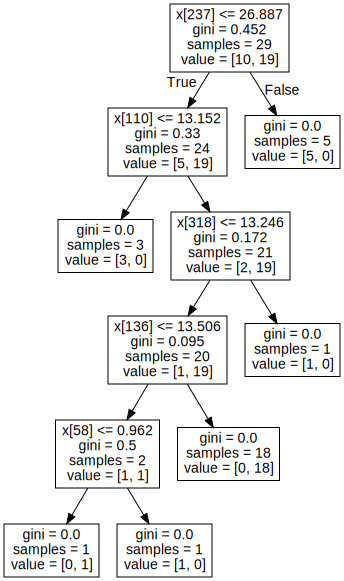

In [ ]:
#1 graphvizをインポートする
import graphviz
from sklearn.tree import export_graphviz

#2 graphvizで決定木モデルを解析する
dot_data = export_graphviz(model)

graph_tree =graphviz.Source(dot_data)
graph_tree

　2-4. 分岐の日付を確認する

In [ ]:
print(Date[237])
print(Date[110])
print(Date[318])
print(Date[136])
print(Date[58])

2022/8/26
2022/4/21
2022/11/15
2022/5/17
2022/2/28


　2-5. （参考）降雪量の場合




In [ ]:
#1 ファイルを読み込む
file_list = glob.glob('/content/*.csv')
print(file_list)

#2 データをリスト化する
Broc = []
Broc_class2 = []
data_list = []

for file in file_list:
  df = pd.read_csv(file)
  Broc.append(df['Broc'][0])
  Broc_class2.append(df['Broc_class2'][0])

  df_cond = df[['snow']]
  data_list.append(df_cond.values.ravel())

#3 日付データをリスト化する
Date = df['date'].tolist()

['/content/IWT_df.csv', '/content/SAG_df.csv', '/content/YGT_df.csv', '/content/TCG_df.csv', '/content/HYG_df.csv', '/content/NGN_df.csv', '/content/OKY_df.csv', '/content/AIC_df.csv', '/content/WKY_df.csv', '/content/SIG_df.csv', '/content/TTR_df.csv', '/content/SZO_df.csv', '/content/GNM_df.csv', '/content/IBR_df.csv', '/content/FKO_df.csv', '/content/FKI_df.csv', '/content/KNG_df.csv', '/content/ISK_df.csv', '/content/SMN_df.csv', '/content/YMN_df.csv', '/content/KUC_df.csv', '/content/AOM_df.csv', '/content/OIT_df.csv', '/content/HKD_df.csv', '/content/AKT_df.csv', '/content/GIF_df.csv', '/content/NAR_df.csv', '/content/KGW_df.csv', '/content/KMM_df.csv', '/content/NGT_df.csv', '/content/TYM_df.csv', '/content/FKS_df.csv', '/content/OKN_df.csv', '/content/MYZ_df.csv', '/content/MYG_df.csv', '/content/CHB_df.csv', '/content/NGS_df.csv', '/content/SIT_df.csv', '/content/OSK_df.csv', '/content/TKS_df.csv', '/content/YGC_df.csv', '/content/KYT_df.csv']


In [ ]:
# ランダムフォレストで分類する
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = data_list
y2 = Broc_class2
y4 = Broc_class4 #ほどよく精度が保たれる
y6 = Broc_class6

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size= 0.3, random_state=random_seed)
model = RandomForestClassifier(random_state= random_seed)
model.fit(X_train, y_train)
model.score(X_test,y_test)
#model.predict(X_test)

0.7692307692307693

In [ ]:
# 決定木
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size= 0.3, random_state=random_seed)

model = DecisionTreeClassifier(random_state=random_seed)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6923076923076923

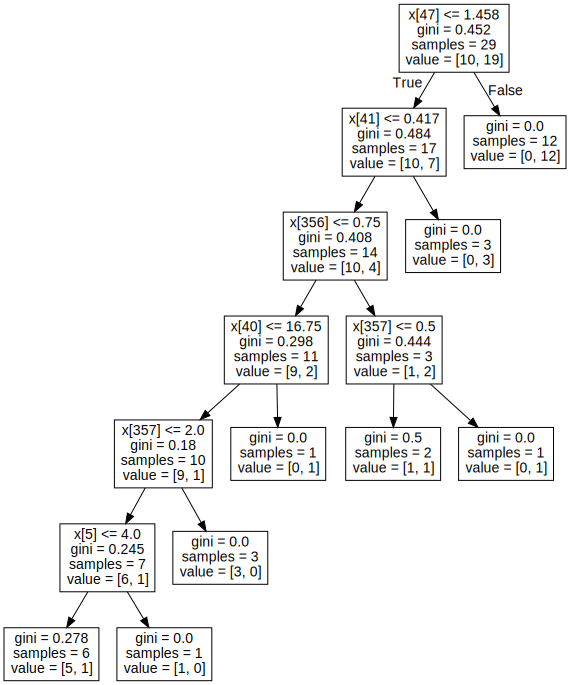

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model)


graph_tree =graphviz.Source(dot_data)
graph_tree

In [ ]:
print(Date[47])
print(Date[41])
print(Date[356])
print(Date[40])
print(Date[357])
print(Date[5])

2022/2/17
2022/2/11
2022/12/23
2022/2/10
2022/12/24
2022/1/6


**3. 分岐日から気象要因をする**

分岐日の前後5日の気象データを取り出す
決定木モデルの分岐点を確認する


　3-1. 収穫量が多い地域での検証

In [ ]:
# pandasのインポートとファイルの読み込み
import pandas as pd

df = pd.read_csv('/content/AIC_df.csv')

df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,temp,prec,sun,snow,humi,temp_s,prec_s,sun_s,snow_s,humi_s,Broc,Broc_class2,Broc_class6,Broc_class4
0,0,0,0,2022/1/1,1.7500,0.125,7.4500,0.0,63.333333,0.830662,0.216506,2.133659,0.0,30.792653,1550,0,0,0
1,1,1,1,2022/1/2,2.5500,0.000,8.1000,0.0,62.666667,1.160819,0.000000,0.698212,0.0,30.356218,1550,0,0,0
2,2,2,2,2022/1/3,4.7750,0.000,7.3000,0.0,75.666667,1.503953,0.000000,2.395308,0.0,36.663802,1550,0,0,0
3,3,3,3,2022/1/4,5.0125,0.000,4.2000,0.0,67.000000,1.338318,0.000000,1.820027,0.0,32.574674,1550,0,0,0
4,4,4,4,2022/1/5,3.5125,0.000,9.2125,0.0,51.000000,0.684539,0.000000,0.176334,0.0,24.735791,1550,0,0,0


　3-2.　気温データ分岐日前5日間の平均気温

In [ ]:
import numpy as np
'''気温の傾向'''
df['temp'][104:110].mean()

14.806249999999999

　3-3.　気温データ分岐日後5日間の平均気温

In [ ]:
df['temp'][111:117].mean()

19.239583333333336

　3-4.　気温データ分岐日前後5日間の平均気温

3-1および3-2で検討した日にち以外のデータの検討

In [ ]:
# 5/17
print(f'Befor 5days: {df["temp"][130:136].mean()}')
print(f'After 5days: {df["temp"][137:142].mean()}')

#11/15
print(f'Nov15_Befor 5days: {df["temp"][312:318].mean()}')
print(f'Nov15_After 5days: {df["temp"][319:325].mean()}')

Befor 5days: 18.114583333333332
After 5days: 19.15
Nov15_Befor 5days: 14.627083333333331
Nov15_After 5days: 12.858333333333334


　3-5. 他の気象データの傾向

In [ ]:
import numpy as np
'''日照時間の傾向'''
print('---日照時間の傾向---')
# 4/28
print(f'Apr28_Befor 5days: {df["sun"][111:117].mean()}')
print(f'Apr28_After 5days: {df["sun"][118:124].mean()}')

# 5/8
print(f'May8_Befor 5days: {df["sun"][121:127].mean()}')
print(f'May8_After 5days: {df["sun"][128:135].mean()}')

'''降水量の傾向'''
print('---降水量の傾向---')
#7/29
print(f'Jul29_Befor 5days: {round(df["prec"][203:209].mean(),2)}')
print(f'Jul29_Befor 5days: {round(df["prec"][210:216].mean(),2)}')
#10/7
print(f'Oct7_Befor 5days: {round(df["prec"][273:279].mean(),2)}')
print(f'Oct7_Befor 5days: {round(df["prec"][280:286].mean(),2)}')

'''降雪量の傾向'''
print('---降雪量の傾向---')
#12/23
print(f'Dec23_Befor 5days: {round(df["snow"][350:356].mean(),2)}')
print(f'Dec23_Befor 5days: {round(df["snow"][357:363].mean(),2)}')
#12/24
print(f'Dec24_Befor 5days: {round(df["snow"][351:357].mean(),2)}')
print(f'Dec24_Befor 5days: {round(df["snow"][358:364].mean(),2)}')

'''湿度の傾向'''
print('---湿度の傾向---')
#5/20
print(f'May20_Befor 5days: {round(df["humi"][133:139].mean(),2)}')
print(f'May20_Befor 5days: {round(df["humi"][140:146].mean(),2)}')

---日照時間の傾向---
Apr28_Befor 5days: 4.895833333333333
Apr28_After 5days: 6.722916666666667
May8_Befor 5days: 9.535416666666666
May8_After 5days: 3.1535714285714285
---降水量の傾向---
Jul29_Befor 5days: 12.11
Jul29_Befor 5days: 0.53
Oct7_Befor 5days: 0.49
Oct7_Befor 5days: 3.16
---降雪量の傾向---
Dec23_Befor 5days: 0.0
Dec23_Befor 5days: 0.0
Dec24_Befor 5days: 0.0
Dec24_Befor 5days: 0.0
---湿度の傾向---
May20_Befor 5days: 78.44
May20_Befor 5days: 83.17


　3-6. 収穫量が少ない地域での検証

In [ ]:
df = pd.read_csv('/content/AOM_df.csv')

'''気温の傾向'''
print(f'Apr21_Befor 5days: {round(df["temp"][104:110].mean(),2)}')
print(f'Apr21_After 5days: {round(df["temp"][111:117].mean(),2)}')
# 5/17
print(f'May17_Befor 5days: {round(df["temp"][130:136].mean(),2)}')
print(f'May17_After 5days: {round(df["temp"][137:142].mean(),2)}')
#11/15
print(f'Nov15_Befor 5days: {round(df["temp"][312:318].mean(),2)}')
print(f'Nov15_After 5days: {round(df["temp"][319:325].mean(),2)}')

'''日照時間の傾向'''
print('---日照時間の傾向---')
# 4/28
print(f'Apr28_Befor 5days: {round(df["sun"][111:117].mean(),2)}')
print(f'Apr28_After 5days: {round(df["sun"][118:124].mean(),2)}')

# 5/8
print(f'May8_Befor 5days: {round(df["sun"][121:127].mean(),2)}')
print(f'May8_After 5days: {round(df["sun"][128:135].mean(),2)}')

'''降水量の傾向'''
print('---降水量の傾向---')
#7/29
print(f'Jul29_Befor 5days: {round(df["prec"][203:209].mean(),2)}')
print(f'Jul29_Befor 5days: {round(df["prec"][210:216].mean(),2)}')
#10/7
print(f'Oct7_Befor 5days: {round(df["prec"][273:279].mean(),2)}')
print(f'Oct7_Befor 5days: {round(df["prec"][280:286].mean(),2)}')

'''降雪量の傾向'''
print('---降雪量の傾向---')
#12/23
print(f'Dec23_Befor 5days: {round(df["snow"][350:356].mean(),2)}')
print(f'Dec23_Befor 5days: {round(df["snow"][357:363].mean(),2)}')
#12/24
print(f'Dec24_Befor 5days: {round(df["snow"][351:357].mean(),2)}')
print(f'Dec24_Befor 5days: {round(df["snow"][358:364].mean(),2)}')

'''湿度の傾向'''
print('---湿度の傾向---')
#5/20
print(f'May20_Befor 5days: {round(df["humi"][133:139].mean(),2)}')
print(f'May20_Befor 5days: {round(df["humi"][140:146].mean(),2)}')

Apr21_Befor 5days: 8.47
Apr21_After 5days: 13.52
May17_Befor 5days: 14.48
May17_After 5days: 16.16
Nov15_Befor 5days: 9.93
Nov15_After 5days: 6.92
---日照時間の傾向---
Apr28_Befor 5days: 7.17
Apr28_After 5days: 6.89
May8_Befor 5days: 10.91
May8_After 5days: 7.41
---降水量の傾向---
Jul29_Befor 5days: 0.18
Jul29_Befor 5days: 25.59
Oct7_Befor 5days: 1.9
Oct7_Befor 5days: 5.97
---降雪量の傾向---
Dec23_Befor 5days: 3.52
Dec23_Befor 5days: 1.9
Dec24_Befor 5days: 3.17
Dec24_Befor 5days: 2.45
---湿度の傾向---
May20_Befor 5days: 65.47
May20_Befor 5days: 74.17


　3-7. （参考）収穫量が多い地域での検証

In [ ]:
df = pd.read_csv('/content/SZO_df.csv')
print(f'Apr21_Befor 5days: {round(df["temp"][104:110].mean(),2)}')
print(f'Apr21_After 5days: {round(df["temp"][111:117].mean(),2)}')
# 5/17
print(f'May17_Befor 5days: {round(df["temp"][130:136].mean(),2)}')
print(f'May17_After 5days: {round(df["temp"][137:142].mean(),2)}')
#11/15
print(f'Nov15_Befor 5days: {round(df["temp"][312:318].mean(),2)}')
print(f'Nov15_After 5days: {round(df["temp"][319:325].mean(),2)}')

'''日照時間の傾向'''
print('---日照時間の傾向---')
# 4/28
print(f'Apr28_Befor 5days: {round(df["sun"][111:117].mean(),2)}')
print(f'Apr28_After 5days: {round(df["sun"][118:124].mean(),2)}')

# 5/8
print(f'May8_Befor 5days: {round(df["sun"][121:127].mean(),2)}')
print(f'May8_After 5days: {round(df["sun"][128:135].mean(),2)}')

'''降水量の傾向'''
print('---降水量の傾向---')
#7/29
print(f'Jul29_Befor 5days: {round(df["prec"][203:209].mean(),2)}')
print(f'Jul29_Befor 5days: {round(df["prec"][210:216].mean(),2)}')
#10/7
print(f'Oct7_Befor 5days: {round(df["prec"][273:279].mean(),2)}')
print(f'Oct7_Befor 5days: {round(df["prec"][280:286].mean(),2)}')

'''降雪量の傾向'''
print('---降雪量の傾向---')
#12/23
print(f'Dec23_Befor 5days: {round(df["snow"][350:356].mean(),2)}')
print(f'Dec23_Befor 5days: {round(df["snow"][357:363].mean(),2)}')
#12/24
print(f'Dec24_Befor 5days: {round(df["snow"][351:357].mean(),2)}')
print(f'Dec24_Befor 5days: {round(df["snow"][358:364].mean(),2)}')

'''湿度の傾向'''
print('---湿度の傾向---')
#5/20
print(f'May20_Befor 5days: {round(df["humi"][133:139].mean(),2)}')
print(f'May20_Befor 5days: {round(df["humi"][140:146].mean(),2)}')

Apr21_Befor 5days: 14.08
Apr21_After 5days: 19.32
May17_Befor 5days: 18.1
May17_After 5days: 18.5
Nov15_Befor 5days: 15.48
Nov15_After 5days: 13.12
---日照時間の傾向---
Apr28_Befor 5days: 5.29
Apr28_After 5days: 6.4
May8_Befor 5days: 9.18
May8_After 5days: 3.78
---降水量の傾向---
Jul29_Befor 5days: 17.56
Jul29_Befor 5days: 1.78
Oct7_Befor 5days: 3.34
Oct7_Befor 5days: 4.26
---降雪量の傾向---
Dec23_Befor 5days: 0.0
Dec23_Befor 5days: 0.0
Dec24_Befor 5days: 0.0
Dec24_Befor 5days: 0.0
---湿度の傾向---
May20_Befor 5days: 80.42
May20_Befor 5days: 79.96


In [ ]:
df = pd.read_csv('/content/MYZ_df.csv')
print(f'Apr21_Befor 5days: {round(df["temp"][104:110].mean(),2)}')
print(f'Apr21_After 5days: {round(df["temp"][111:117].mean(),2)}')
# 5/17
print(f'May17_Befor 5days: {round(df["temp"][130:136].mean(),2)}')
print(f'May17_After 5days: {round(df["temp"][137:142].mean(),2)}')
#11/15
print(f'Nov15_Befor 5days: {round(df["temp"][312:318].mean(),2)}')
print(f'Nov15_After 5days: {round(df["temp"][319:325].mean(),2)}')

'''日照時間の傾向'''
print('---日照時間の傾向---')
# 4/28
print(f'Apr28_Befor 5days: {round(df["sun"][111:117].mean(),2)}')
print(f'Apr28_After 5days: {round(df["sun"][118:124].mean(),2)}')

# 5/8
print(f'May8_Befor 5days: {round(df["sun"][121:127].mean(),2)}')
print(f'May8_After 5days: {round(df["sun"][128:135].mean(),2)}')

'''降水量の傾向'''
print('---降水量の傾向---')
#7/29
print(f'Jul29_Befor 5days: {round(df["prec"][203:209].mean(),2)}')
print(f'Jul29_Befor 5days: {round(df["prec"][210:216].mean(),2)}')
#10/7
print(f'Oct7_Befor 5days: {round(df["prec"][273:279].mean(),2)}')
print(f'Oct7_Befor 5days: {round(df["prec"][280:286].mean(),2)}')

'''降雪量の傾向'''
print('---降雪量の傾向---')
#12/23
print(f'Dec23_Befor 5days: {round(df["snow"][350:356].mean(),2)}')
print(f'Dec23_Befor 5days: {round(df["snow"][357:363].mean(),2)}')
#12/24
print(f'Dec24_Befor 5days: {round(df["snow"][351:357].mean(),2)}')
print(f'Dec24_Befor 5days: {round(df["snow"][358:364].mean(),2)}')

'''湿度の傾向'''
print('---湿度の傾向---')
#5/20
print(f'May20_Befor 5days: {round(df["humi"][133:139].mean(),2)}')
print(f'May20_Befor 5days: {round(df["humi"][140:146].mean(),2)}')

Apr21_Befor 5days: 16.22
Apr21_After 5days: 19.46
May17_Befor 5days: 19.02
May17_After 5days: 18.41
Nov15_Befor 5days: 17.54
Nov15_After 5days: 14.86
---日照時間の傾向---
Apr28_Befor 5days: 2.66
Apr28_After 5days: 7.08
May8_Befor 5days: 6.12
May8_After 5days: 0.84
---降水量の傾向---
Jul29_Befor 5days: 3.02
Jul29_Befor 5days: 9.29
Oct7_Befor 5days: 0.04
Oct7_Befor 5days: 0.91
---降雪量の傾向---
Dec23_Befor 5days: 0.0
Dec23_Befor 5days: 0.0
Dec24_Befor 5days: 0.0
Dec24_Befor 5days: 0.0
---湿度の傾向---
May20_Befor 5days: 77.04
May20_Befor 5days: 85.67


In [ ]:
df = pd.read_csv('/content/SIT_df.csv')
print(f'Apr21_Befor 5days: {round(df["temp"][104:110].mean(),2)}')
print(f'Apr21_After 5days: {round(df["temp"][111:117].mean(),2)}')
# 5/17
print(f'May17_Befor 5days: {round(df["temp"][130:136].mean(),2)}')
print(f'May17_After 5days: {round(df["temp"][137:142].mean(),2)}')
#11/15
print(f'Nov15_Befor 5days: {round(df["temp"][312:318].mean(),2)}')
print(f'Nov15_After 5days: {round(df["temp"][319:325].mean(),2)}')

'''日照時間の傾向'''
print('---日照時間の傾向---')
# 4/28
print(f'Apr28_Befor 5days: {round(df["sun"][111:117].mean(),2)}')
print(f'Apr28_After 5days: {round(df["sun"][118:124].mean(),2)}')

# 5/8
print(f'May8_Befor 5days: {round(df["sun"][121:127].mean(),2)}')
print(f'May8_After 5days: {round(df["sun"][128:135].mean(),2)}')

'''降水量の傾向'''
print('---降水量の傾向---')
#7/29
print(f'Jul29_Befor 5days: {round(df["prec"][203:209].mean(),2)}')
print(f'Jul29_Befor 5days: {round(df["prec"][210:216].mean(),2)}')
#10/7
print(f'Oct7_Befor 5days: {round(df["prec"][273:279].mean(),2)}')
print(f'Oct7_Befor 5days: {round(df["prec"][280:286].mean(),2)}')

'''降雪量の傾向'''
print('---降雪量の傾向---')
#12/23
print(f'Dec23_Befor 5days: {round(df["snow"][350:356].mean(),2)}')
print(f'Dec23_Befor 5days: {round(df["snow"][357:363].mean(),2)}')
#12/24
print(f'Dec24_Befor 5days: {round(df["snow"][351:357].mean(),2)}')
print(f'Dec24_Befor 5days: {round(df["snow"][358:364].mean(),2)}')

'''湿度の傾向'''
print('---湿度の傾向---')
#5/20
print(f'May20_Befor 5days: {round(df["humi"][133:139].mean(),2)}')
print(f'May20_Befor 5days: {round(df["humi"][140:146].mean(),2)}')

Apr21_Befor 5days: 11.98
Apr21_After 5days: 19.71
May17_Befor 5days: 17.79
May17_After 5days: 18.9
Nov15_Befor 5days: 13.49
Nov15_After 5days: 10.7
---日照時間の傾向---
Apr28_Befor 5days: 5.64
Apr28_After 5days: 7.62
May8_Befor 5days: 9.72
May8_After 5days: 3.54
---降水量の傾向---
Jul29_Befor 5days: 5.09
Jul29_Befor 5days: 4.99
Oct7_Befor 5days: 3.1
Oct7_Befor 5days: 2.62
---降雪量の傾向---
Dec23_Befor 5days: 0.0
Dec23_Befor 5days: 0.0
Dec24_Befor 5days: 0.0
Dec24_Befor 5days: 0.0
---湿度の傾向---
May20_Befor 5days: 74.67
May20_Befor 5days: 73.83


In [ ]:
df = pd.read_csv('/content/TYM_df.csv')
print(f'Apr21_Befor 5days: {round(df["temp"][104:110].mean(),2)}')
print(f'Apr21_After 5days: {round(df["temp"][111:117].mean(),2)}')
# 5/17
print(f'May17_Befor 5days: {round(df["temp"][130:136].mean(),2)}')
print(f'May17_After 5days: {round(df["temp"][137:142].mean(),2)}')
#11/15
print(f'Nov15_Befor 5days: {round(df["temp"][312:318].mean(),2)}')
print(f'Nov15_After 5days: {round(df["temp"][319:325].mean(),2)}')

'''日照時間の傾向'''
print('---日照時間の傾向---')
# 4/28
print(f'Apr28_Befor 5days: {round(df["sun"][111:117].mean(),2)}')
print(f'Apr28_After 5days: {round(df["sun"][118:124].mean(),2)}')

# 5/8
print(f'May8_Befor 5days: {round(df["sun"][121:127].mean(),2)}')
print(f'May8_After 5days: {round(df["sun"][128:135].mean(),2)}')

'''降水量の傾向'''
print('---降水量の傾向---')
#7/29
print(f'Jul29_Befor 5days: {round(df["prec"][203:209].mean(),2)}')
print(f'Jul29_Befor 5days: {round(df["prec"][210:216].mean(),2)}')
#10/7
print(f'Oct7_Befor 5days: {round(df["prec"][273:279].mean(),2)}')
print(f'Oct7_Befor 5days: {round(df["prec"][280:286].mean(),2)}')

'''降雪量の傾向'''
print('---降雪量の傾向---')
#12/23
print(f'Dec23_Befor 5days: {round(df["snow"][350:356].mean(),2)}')
print(f'Dec23_Befor 5days: {round(df["snow"][357:363].mean(),2)}')
#12/24
print(f'Dec24_Befor 5days: {round(df["snow"][351:357].mean(),2)}')
print(f'Dec24_Befor 5days: {round(df["snow"][358:364].mean(),2)}')

'''湿度の傾向'''
print('---湿度の傾向---')
#5/20
print(f'May20_Befor 5days: {round(df["humi"][133:139].mean(),2)}')
print(f'May20_Befor 5days: {round(df["humi"][140:146].mean(),2)}')

Apr21_Befor 5days: 10.89
Apr21_After 5days: 16.41
May17_Befor 5days: 16.22
May17_After 5days: 19.28
Nov15_Befor 5days: 13.15
Nov15_After 5days: 11.12
---日照時間の傾向---
Apr28_Befor 5days: 3.18
Apr28_After 5days: 7.25
May8_Befor 5days: 11.39
May8_After 5days: 3.75
---降水量の傾向---
Jul29_Befor 5days: 5.85
Jul29_Befor 5days: 10.74
Oct7_Befor 5days: 5.64
Oct7_Befor 5days: 6.62
---降雪量の傾向---
Dec23_Befor 5days: 5.03
Dec23_Befor 5days: 0.77
Dec24_Befor 5days: 9.4
Dec24_Befor 5days: 0.47
---湿度の傾向---
May20_Befor 5days: 65.67
May20_Befor 5days: 69.03


In [ ]:
df = pd.read_csv('/content/TTR_df.csv')
print(f'Apr21_Befor 5days: {round(df["temp"][104:110].mean(),2)}')
print(f'Apr21_After 5days: {round(df["temp"][111:117].mean(),2)}')
# 5/17
print(f'May17_Befor 5days: {round(df["temp"][130:136].mean(),2)}')
print(f'May17_After 5days: {round(df["temp"][137:142].mean(),2)}')
#11/15
print(f'Nov15_Befor 5days: {round(df["temp"][312:318].mean(),2)}')
print(f'Nov15_After 5days: {round(df["temp"][319:325].mean(),2)}')

'''日照時間の傾向'''
print('---日照時間の傾向---')
# 4/28
print(f'Apr28_Befor 5days: {round(df["sun"][111:117].mean(),2)}')
print(f'Apr28_After 5days: {round(df["sun"][118:124].mean(),2)}')

# 5/8
print(f'May8_Befor 5days: {round(df["sun"][121:127].mean(),2)}')
print(f'May8_After 5days: {round(df["sun"][128:135].mean(),2)}')

'''降水量の傾向'''
print('---降水量の傾向---')
#7/29
print(f'Jul29_Befor 5days: {round(df["prec"][203:209].mean(),2)}')
print(f'Jul29_Befor 5days: {round(df["prec"][210:216].mean(),2)}')
#10/7
print(f'Oct7_Befor 5days: {round(df["prec"][273:279].mean(),2)}')
print(f'Oct7_Befor 5days: {round(df["prec"][280:286].mean(),2)}')

'''降雪量の傾向'''
print('---降雪量の傾向---')
#12/23
print(f'Dec23_Befor 5days: {round(df["snow"][350:356].mean(),2)}')
print(f'Dec23_Befor 5days: {round(df["snow"][357:363].mean(),2)}')
#12/24
print(f'Dec24_Befor 5days: {round(df["snow"][351:357].mean(),2)}')
print(f'Dec24_Befor 5days: {round(df["snow"][358:364].mean(),2)}')

'''湿度の傾向'''
print('---湿度の傾向---')
#5/20
print(f'May20_Befor 5days: {round(df["humi"][133:139].mean(),2)}')
print(f'May20_Befor 5days: {round(df["humi"][140:146].mean(),2)}')

Apr21_Befor 5days: 11.62
Apr21_After 5days: 17.64
May17_Befor 5days: 16.88
May17_After 5days: 18.73
Nov15_Befor 5days: 14.33
Nov15_After 5days: 10.96
---日照時間の傾向---
Apr28_Befor 5days: 4.83
Apr28_After 5days: 7.86
May8_Befor 5days: 10.64
May8_After 5days: 3.31
---降水量の傾向---
Jul29_Befor 5days: 1.09
Jul29_Befor 5days: 0.23
Oct7_Befor 5days: 3.34
Oct7_Befor 5days: 2.21
---降雪量の傾向---
Dec23_Befor 5days: 1.3
Dec23_Befor 5days: 0.53
Dec24_Befor 5days: 2.0
Dec24_Befor 5days: 0.03
---湿度の傾向---
May20_Befor 5days: 66.4
May20_Befor 5days: 69.4
